# **SpaceX Falcon 9 First Stage Landing Prediction**

## Exploring and Preparing Data

On its website, SpaceX promotes Falcon 9 rocket launches at a price of 62 million dollars, which is significantly lower than other providers who charge upward of 165 million dollars per launch. The primary reason for this cost savings is SpaceX's ability to reuse the first stage of the rocket. As a result, by determining the likelihood of the first stage landing successfully, we can calculate the cost of a launch. 

This information can be useful for a competing company that wants to bid against SpaceX for a rocket launch. We will gather and format data from an API to predict the success of the Falcon 9 first stage landing. Exploratory Data Analysis and Feature Engineering will be performed further.

Below is an example of a successful launch and landing and unsuccessful ones.

<div style="text-align:center">
<img src="./../Resources/success_landing.gif" alt="Success" style="height:200px; width:auto; display:inline-block; margin:auto;">
<img src="./../Resources/unsuccess_landing.gif" alt="Unsuccess" style="height:200px; width:auto; display:inline-block; margin:auto;">
</div>   

## Objectives

* Exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`
    * Exploratory Data Analysis
    * Preparing Data  Feature Engineering

***

### Import Libraries

We will import the following libraries the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("./../0_Datasets/dataset_part_2.csv")

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


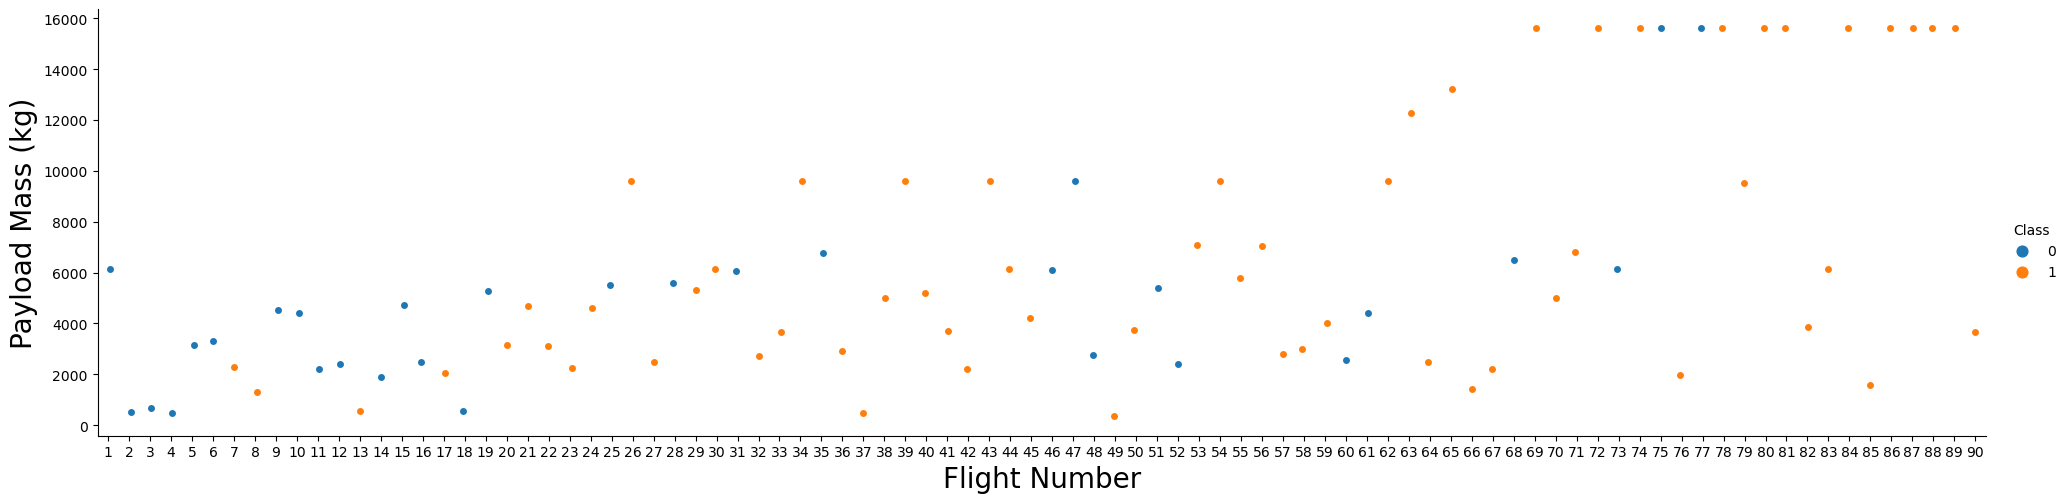

In [3]:
# Plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

This is how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables affect the launch outcome.

As the flight number increases, the first stage is more likely to land successfully. 

When nr of flights are low the payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

### Visualize the relationship between Flight Number and Launch Site

In [4]:
# Determine success rate for each Launch Site
success_rates = df.groupby('LaunchSite')['Class'].mean()
success_rates

LaunchSite
CCSFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

Different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

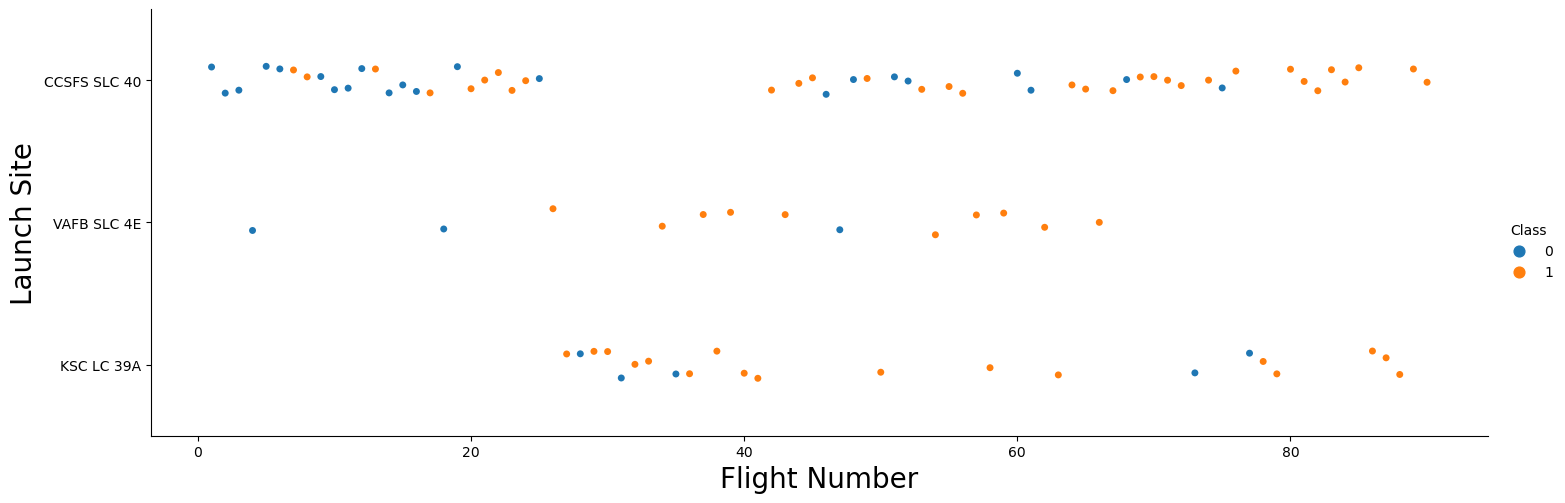

In [5]:
# Ploting a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

After making more than 20 flights (aproximatively) there is a increase of succesfull flights. After 80 flights there was no failures. 

### Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


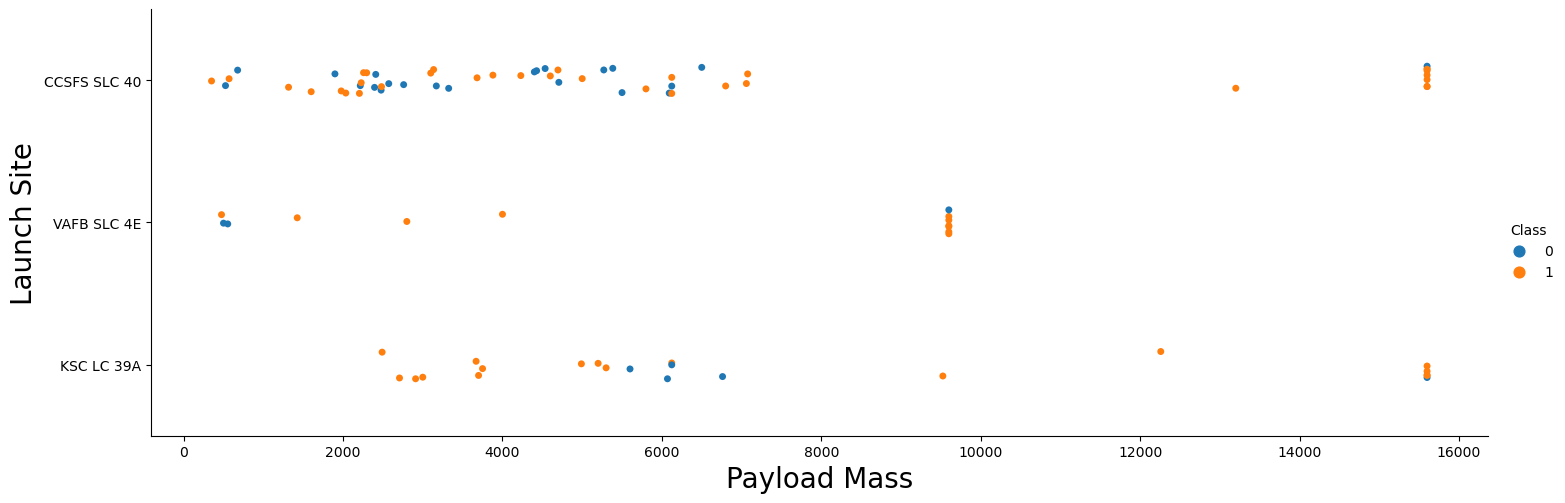

In [6]:
# Plotting relationship between launch sites and their payload mass

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=3)
plt.xlabel("Payload Mass", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

At VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000). There are more succsessful flights with increased payload. Success could not be related to payload mass but to increased experience and number of flights. Perhaps payload increased gradualy with flights numbers. 

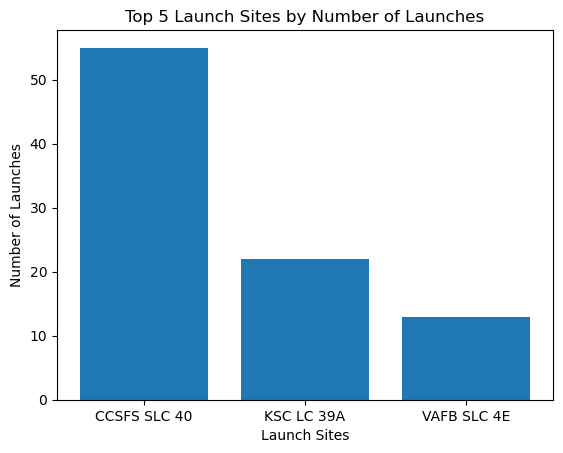

In [7]:

# Group the data by launch pad and count the number of launches
launch_pads = df.groupby('LaunchSite')['LaunchSite'].count()

# Sort the launch pads by number of launches and take the top 5
top_launch_pads = launch_pads.sort_values(ascending=False)[:5]

# Plot the results
plt.bar(top_launch_pads.index, top_launch_pads.values)
plt.title('Top 5 Launch Sites by Number of Launches')
plt.xlabel('Launch Sites')
plt.ylabel('Number of Launches')
plt.show()

### Visualize the relationship between success rate of each orbit type

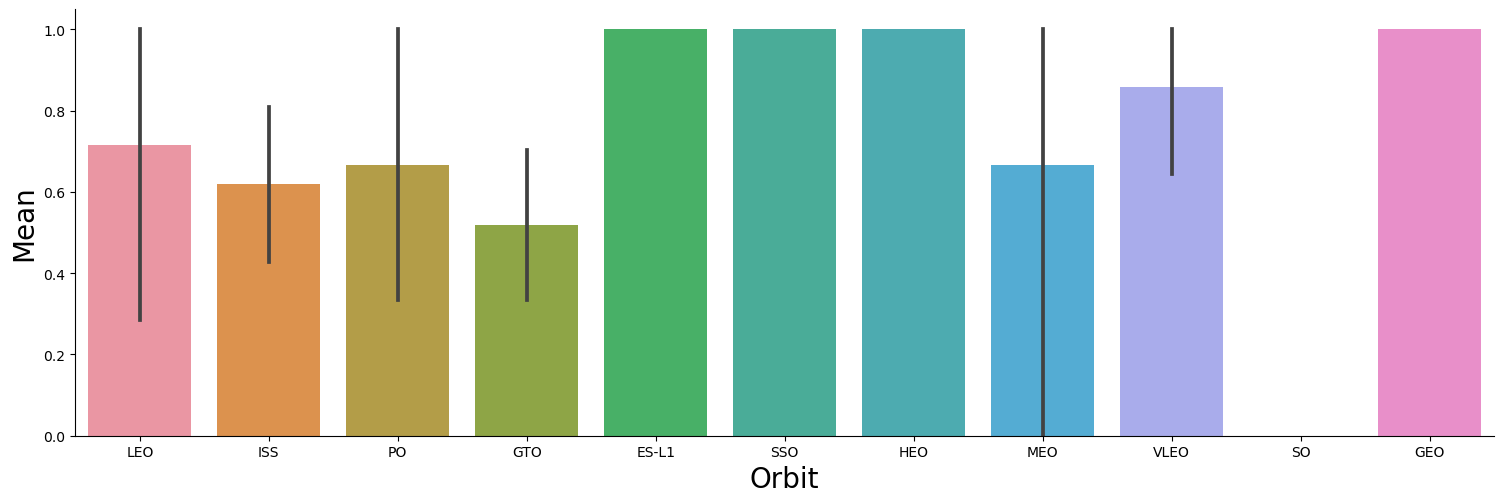

In [8]:
# Plotting relationship between success rate and orbit type
df.groupby(['Orbit']).mean()

sns.catplot(x="Orbit", y="Class", kind="bar", data=df, aspect=3)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Mean", fontsize=20)
plt.show()

Highest Sucess rates: ES-L1, GEO, HEO, SSO. Lowest Sucess rates: SO. 

### Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


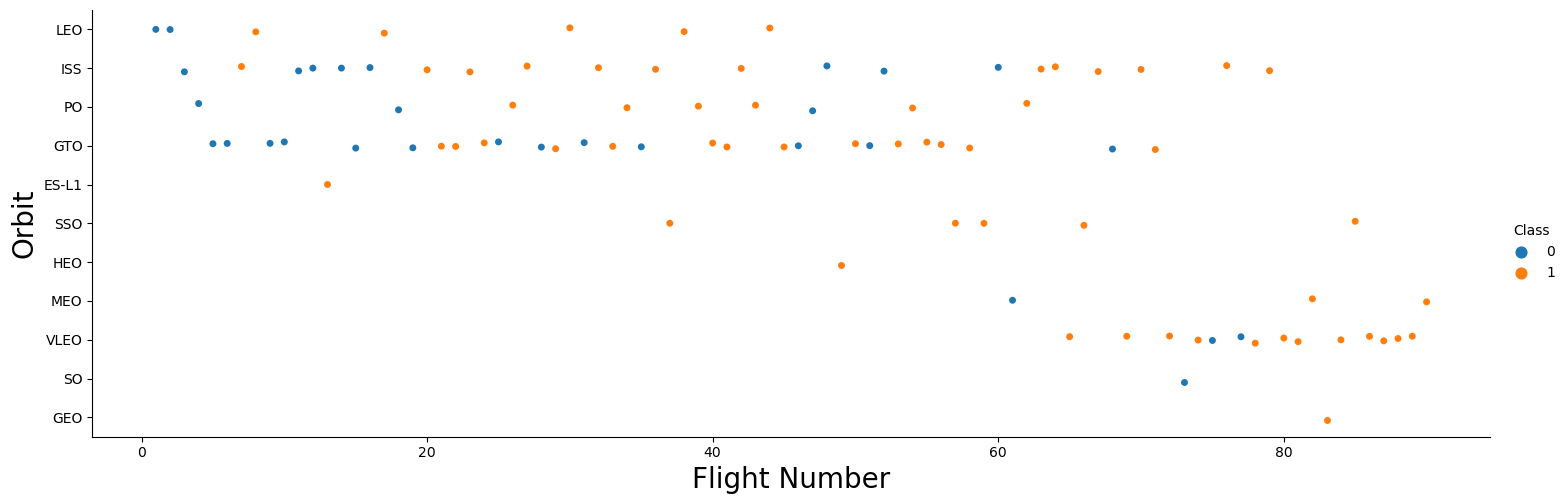

In [9]:
# Plot to determine if there is any relationship between FlightNumber and Orbit type.

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=3)
plt.ylabel("Orbit", fontsize=20)
plt.xlabel("Flight Number", fontsize=20)
plt.show()

In the LEO orbit the Success appears related to the number of flights. There seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


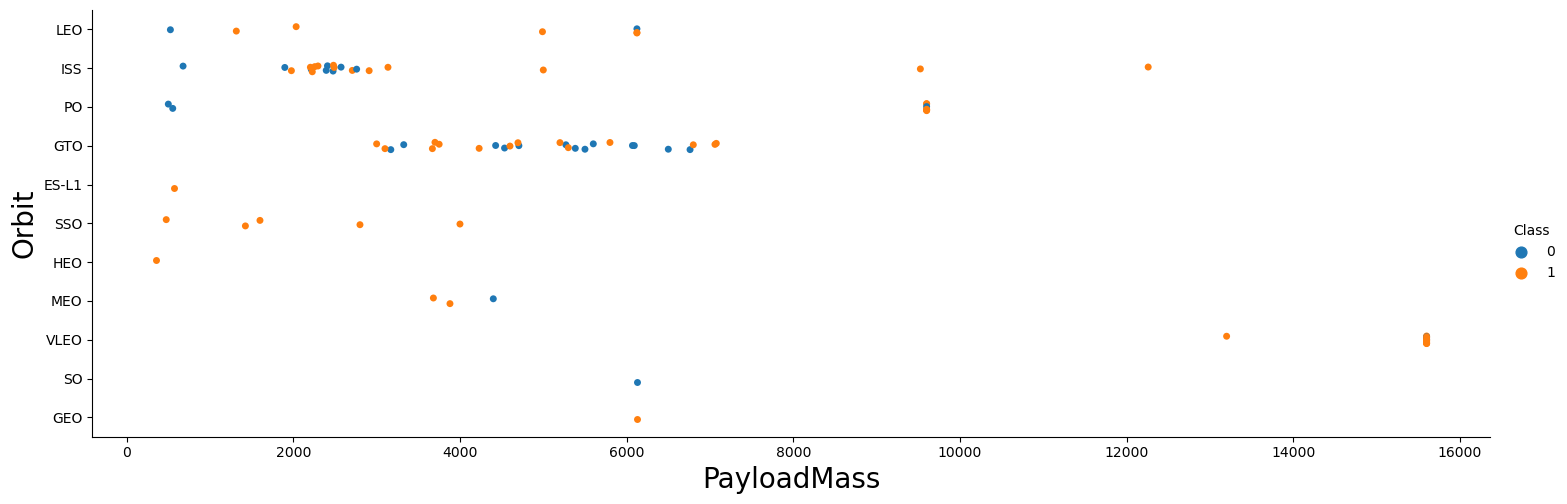

In [10]:
# Plotting to reveal the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data = df, aspect=3)
plt.ylabel("Orbit", fontsize=20)
plt.xlabel("PayloadMass", fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.

### Visualize the launch success yearly trend

In [11]:
# Function to Extract years from the date 
year=[]
def extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year    

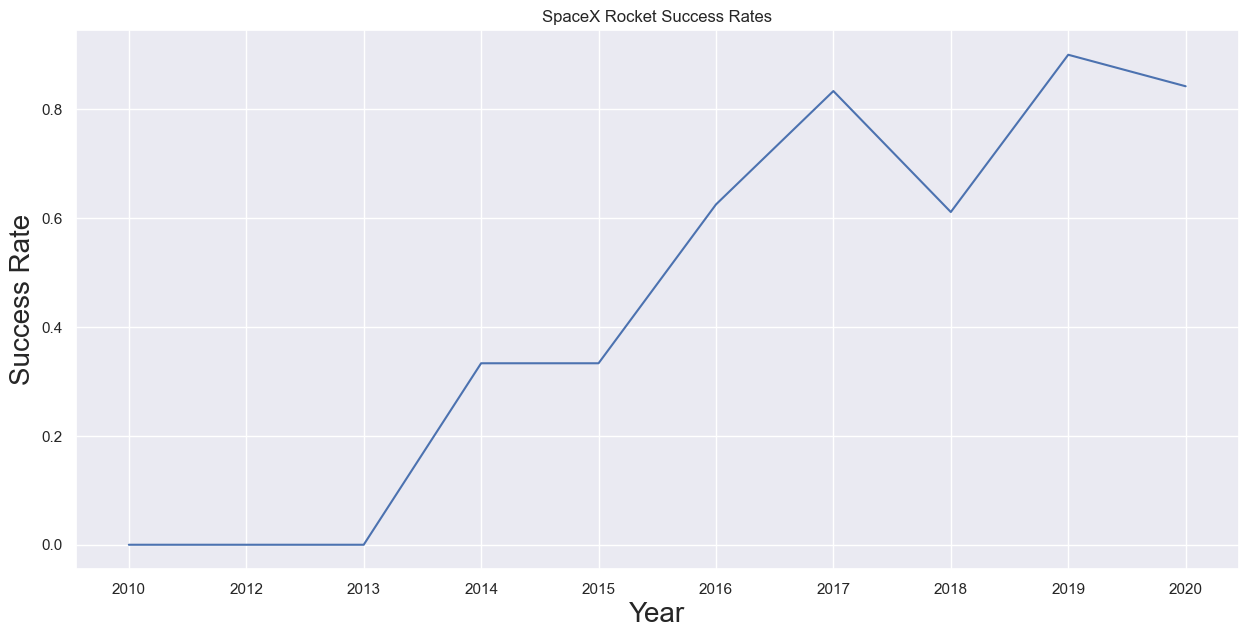

In [12]:
# Plot a line chart to get the average launch success trend.

df['year']=extract_year(df["Date"])
df_groupby_year=df.groupby("year", as_index=False)["Class"].mean()

sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=df_groupby_year, x="year", y="Class")
plt.xlabel("Year", fontsize=20)
plt.title('SpaceX Rocket Success Rates')
plt.ylabel("Success Rate", fontsize=20)
plt.show()

Sucess rate since 2013 kept increasing till 2020.

## Features Engineering

In [13]:
# Selecting the features that will be used in success prediction in the future module
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns

In [14]:
# Applying  OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial (function get_dummies)
features_one_hot = features

features_one_hot = pd.concat([features_one_hot, pd.get_dummies(df['Orbit'])], axis=1)
features_one_hot.drop(['Orbit'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LaunchSite'])], axis=1)
features_one_hot.drop(['LaunchSite'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LandingPad'])], axis=1)
features_one_hot.drop(['LandingPad'], axis = 1,inplace=True)

features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Serial'])], axis=1)
features_one_hot.drop(['Serial'], axis = 1,inplace=True)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [15]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ES-L1,GEO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
features_one_hot.to_csv('./../0_Datasets/dataset_part_3.csv', index=False)

* The number of SpaceX launches has been increasing steadily over the years, with a significant increase in the number of launches in recent years.

* The Falcon 9 rocket is the most commonly used rocket for SpaceX launches.

* The most common launch site is the Cape Canaveral Air Force Station, followed by the Kennedy Space Center.

* Most of the launches are successful, with only a small percentage of failures.

* The number of reused rockets has been increasing steadily, indicating that SpaceX is successfully implementing its reusable rocket technology.